In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split


In [4]:
def dfdx(x,y):
    return 2*x
def dfdy(x,y):
    return 2*y

def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])


# 1.1 Classic gradient descent



In [5]:
def grad_descent_mult(df,x_prev,learn_rate):
    #value of the stop criterion
    epsilon = 0.0001 
    #iteration counter
    grad_itter = 1
    
    #aarays of "visited" point (function arguments)
    seq_x = [] 
    seq_y = []

    # we move in the direction of anti-gradient as far as it is a direction of the fastest decreasing of the objective function
    x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[0],x_prev[1]))
    #History of visited point (by coordinates)
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    #do actions while stop criterion is false
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y)

# 2.1 Checking of gradient descent on function 
$$f^2 = x^2 + y^2$$


In [6]:
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)
x_min = grad_output[0][0]
y_min = grad_output[0][1]
print('Minimum (x,y) from gradient descent: {0:.4f},  {0:.4f} '.format(x_min,y_min))
print('Number of gradient descent iterations: %s' %grad_output[1])


Minimum (x,y) from gradient descent: 0.0001,  0.0001 
Number of gradient descent iterations: 21


In [7]:
diff = []
for i in range(1, grad_output[1], 1):
  val = np.sqrt((grad_output[2][i] - grad_output[2][i-1])**2 + (grad_output[3][i] - grad_output[3][i-1])**2)
  diff = np.append(diff, val)



#3.1 Graph of dependence  between iteration number and $|x_{prev} - x_{next}|$ in case of gradient descent

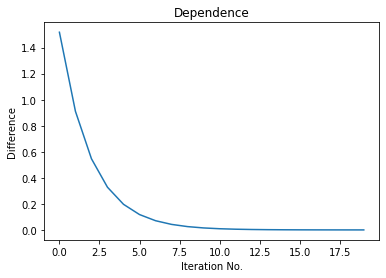

In [8]:
plt.plot(np.arange(grad_output[1]-1),diff)
plt.xlabel('Iteration No.')
plt.ylabel('Difference')
plt.title('Dependence')
plt.show()

#1.2 Adam optimization algorithm

In [10]:
def adam(df,x_prev,learn_rate, beta_1, beta_2, gamma):

    #value of the stop criterion
    epsilon = 0.0001 
    #iteration counter
    grad_itter = 1
    
    #aarays of "visited" point (function arguments)
    seq_x = [] 
    seq_y = []
    V_prev = 0
    S_prev = 0
    #before defining next point we should add vectors V_t and S_t
    V_next = beta_1 * V_prev + (1 - beta_1) * grad_vector(x_prev[0], x_prev[1])
    S_next = beta_2 * S_prev + ( 1 - beta_2) * (grad_vector(x_prev[0], x_prev[1]))**2
    S_next_corr = S_next/(1 - gamma)
    
    x_next = np.subtract(x_prev, learn_rate * V_next * (1 / (np.sqrt(S_next_corr) + epsilon)))
    #History of visited point (by coordinates)
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    #do actions while stop criterion is false
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        V_prev = V_next
        S_prev = S_next
        V_next = beta_1 * V_prev + (1 - beta_1) * grad_vector(x_prev[0], x_prev[1])
        S_next = beta_2 * S_prev + ( 1 - beta_2) * (grad_vector(x_prev[0], x_prev[1]))**2
        S_next_corr = S_next/(1 - gamma)
    
        x_next = np.subtract(x_prev, learn_rate * V_next * (1 / (np.sqrt(S_next_corr) + epsilon)))
        #x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y)

# 2.2 Checking of Adam on function 
$$f^2 = x^2 + y^2$$


In [21]:
grad_output_adam = adam(grad_vector, np.array([6,2]), 0.5, 0.9, 0.99, 0.3)
x_min = grad_output_adam[0][0]
y_min = grad_output_adam[0][1]
print('Minimum (x,y) from gradient descent: {0:.4f},  {0:.4f} '.format(x_min,y_min))
print('Number of gradient descent iterations: %s' %grad_output_adam[1])

Minimum (x,y) from gradient descent: 0.0007,  0.0007 
Number of gradient descent iterations: 174


In [19]:
diff_adam = []
for i in range(1, grad_output_adam[1], 1):
  val = np.sqrt((grad_output_adam[2][i] - grad_output_adam[2][i-1])**2 + (grad_output_adam[3][i] - grad_output_adam[3][i-1])**2)
  diff_adam = np.append(diff_adam, val)

#3.2 Graph of dependence  between iteration number and $|x_{prev} - x_{next}|$ in case of Adam

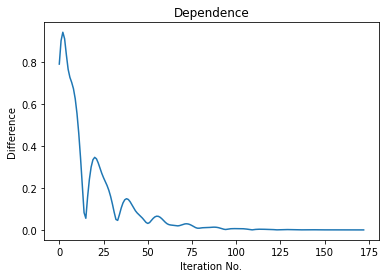

In [20]:
plt.plot(np.arange(grad_output_adam[1]-1),diff_adam)
plt.xlabel('Iteration No.')
plt.ylabel('Difference')
plt.title('Dependence')
plt.show()